### Working with missing data

Notebook to study effects of mean and median imputation, and interpolation

In [116]:
import numpy as np
import pandas as pd
from pylab import *
import math

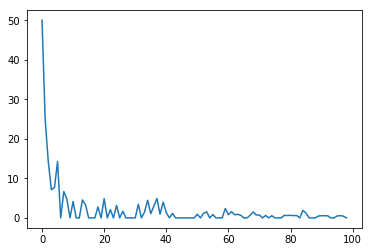

In [126]:
# Sensitivity to mean imputation

mean_change = []
for i in list(np.arange(10,1000,10)):
    dataset = np.random.binomial(20,0.01,i)
    mean_original = np.mean(dataset)
    dataset[np.random.randint(0,i*0.25)] = mean_original
    dataset[np.random.randint(i*0.25,i*0.5)] = mean_original
    dataset[np.random.randint(i*0.5,i*0.75)] = mean_original
    dataset[np.random.randint(i*0.75,i)] = mean_original
    mean_new = np.mean(dataset)
#     print mean_original, mean_new
    change = (np.abs(mean_original - mean_new)/mean_original)*100
    mean_change.append(change)
plt.plot(mean_change)
plt.show()
plt.clf()

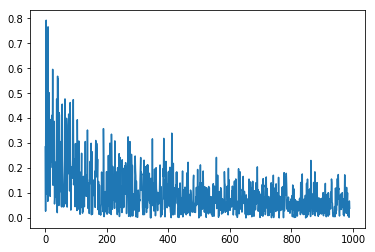

In [129]:
# Sensitivity to median imputation

median_change = []
for i in list(np.arange(1000,100000,100)):
    dataset = np.random.binomial(2000,0.01,i)
    median_original = np.median(dataset)
    dataset[np.random.randint(0,i*0.25)] = median_original
    dataset[np.random.randint(i*0.25,i*0.5)] = median_original
    dataset[np.random.randint(i*0.5,i*0.75)] = median_original
    dataset[np.random.randint(i*0.75,i)] = median_original
    median_new = np.mean(dataset)
    change = (np.abs(median_original - median_new)/median_original)*100
    median_change.append(change)
plt.plot(median_change)
plt.show()

### Interpolation of data

In [130]:
# Data dropping and interpolation sample
dataset = np.zeros([100,100])
for i in list(range(0,100)):
    for j in list(range(0,10)):
        dataset[i][j] = np.random.ranf()
dataset[4][4] = np.nan
dataset[2][7] = np.nan
datasetPd = pd.DataFrame(dataset)


In [131]:
print len(datasetPd)
datasetPd.loc[:6,:].style.highlight_null()

100


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.080989,0.244596,0.0396645,0.753482,0.726096,0.166138,0.351378,0.78235,0.882164,0.44681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.112077,0.140289,0.799413,0.242741,0.879243,0.474859,0.274363,0.81593,0.330544,0.626518,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0350225,0.493154,0.341832,0.745816,0.227507,0.181501,0.717842,nan,0.175521,0.666006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.642019,0.682249,0.507292,0.91289,0.614306,0.253481,0.387235,0.412625,0.96907,0.940095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.563625,0.229892,0.169653,0.882087,nan,0.529215,0.284364,0.513827,0.289158,0.369962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.322355,0.255133,0.0752726,0.221412,0.822072,0.970245,0.644193,0.376351,0.812038,0.196545,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.987517,0.664599,0.778671,0.935734,0.173263,0.0560221,0.433707,0.568142,0.807307,0.113954,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


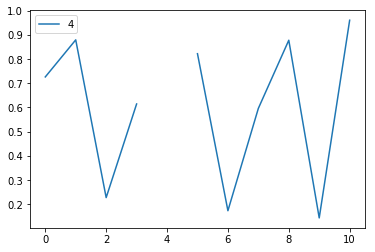

In [132]:
fig = datasetPd.loc[:10,[4]].plot()
fig.figure

In [133]:
# drop the row with missing data
datasetPdNew = datasetPd.copy()
datasetPdNew.dropna(inplace=True)
print len(datasetPdNew)
datasetPdNew.head()

98


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.080989,0.244596,0.039664,0.753482,0.726096,0.166138,0.351378,0.782350,0.882164,0.446810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.112077,0.140289,0.799413,0.242741,0.879243,0.474859,0.274363,0.815930,0.330544,0.626518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.642019,0.682249,0.507292,0.912890,0.614306,0.253481,0.387235,0.412625,0.969070,0.940095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.322355,0.255133,0.075273,0.221412,0.822072,0.970245,0.644193,0.376351,0.812038,0.196545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.987517,0.664599,0.778671,0.935734,0.173263,0.056022,0.433707,0.568142,0.807307,0.113954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


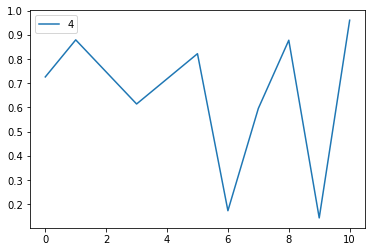

In [134]:
fig = datasetPdNew.loc[:10,[4]].plot()
fig.figure


In [138]:
# interpolate

datasetPd = datasetPd.interpolate()
print len(datasetPd)
fig = datasetPd.loc[:10,[7]].plot()
fig.figure
datasetPd.head(10)

100


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.080989,0.244596,0.039664,0.753482,0.726096,0.166138,0.351378,0.782350,0.882164,0.446810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.112077,0.140289,0.799413,0.242741,0.879243,0.474859,0.274363,0.815930,0.330544,0.626518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.035022,0.493154,0.341832,0.745816,0.227507,0.181501,0.717842,0.614277,0.175521,0.666006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.642019,0.682249,0.507292,0.912890,0.614306,0.253481,0.387235,0.412625,0.969070,0.940095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.563625,0.229892,0.169653,0.882087,0.718189,0.529215,0.284364,0.513827,0.289158,0.369962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.322355,0.255133,0.075273,0.221412,0.822072,0.970245,0.644193,0.376351,0.812038,0.196545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.987517,0.664599,0.778671,0.935734,0.173263,0.056022,0.433707,0.568142,0.807307,0.113954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.279885,0.416027,0.732074,0.787926,0.596070,0.832992,0.997713,0.395901,0.167875,0.723050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.238156,0.958608,0.391220,0.305719,0.877703,0.098448,0.629105,0.603739,0.963581,0.084734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.290587,0.153754,0.739747,0.936734,0.143547,0.767980,0.095425,0.064236,0.833727,0.720802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
plt.close('all')

### Outliers

In [141]:
datasetPd.iloc[[6],4] = 2
datasetPd.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.080989,0.244596,0.039664,0.753482,0.726096,0.166138,0.351378,0.782350,0.882164,0.446810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.112077,0.140289,0.799413,0.242741,0.879243,0.474859,0.274363,0.815930,0.330544,0.626518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.035022,0.493154,0.341832,0.745816,0.227507,0.181501,0.717842,0.614277,0.175521,0.666006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.642019,0.682249,0.507292,0.912890,0.614306,0.253481,0.387235,0.412625,0.969070,0.940095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.563625,0.229892,0.169653,0.882087,0.718189,0.529215,0.284364,0.513827,0.289158,0.369962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.322355,0.255133,0.075273,0.221412,0.822072,0.970245,0.644193,0.376351,0.812038,0.196545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.987517,0.664599,0.778671,0.935734,2.000000,0.056022,0.433707,0.568142,0.807307,0.113954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.279885,0.416027,0.732074,0.787926,0.596070,0.832992,0.997713,0.395901,0.167875,0.723050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.238156,0.958608,0.391220,0.305719,0.877703,0.098448,0.629105,0.603739,0.963581,0.084734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.290587,0.153754,0.739747,0.936734,0.143547,0.767980,0.095425,0.064236,0.833727,0.720802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


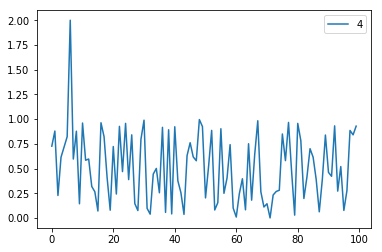

In [142]:
fig = datasetPd.loc[:,[4]].plot()
fig.figure

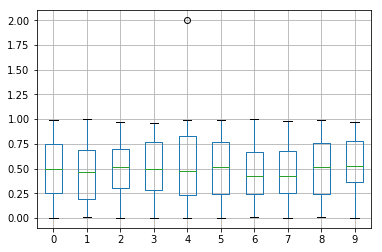

In [143]:
plt.cla()
fig = datasetPd.boxplot(column=list(range(10)))
fig.figure

### NDCG

NDCG is a measure of relevency in search documents

In [109]:
positions = list(range(6))
relevency = np.array(list(range(6)))
# relevency = map(lambda r:np.random.randint(0,4), relevency)
relevency = [3,2,3,0,1,2]

In [110]:
relevency

[3, 2, 3, 0, 1, 2]

In [111]:
log_i = map(lambda r:math.log(r+2,2), positions)
log_i

[1.0,
 1.5849625007211563,
 2.0,
 2.321928094887362,
 2.584962500721156,
 2.807354922057604]

In [112]:
dcg = []
for i in list(range(len(relevency))):
    dcg.append(relevency[i]/log_i[i])
dcg

[3.0, 1.2618595071429148, 1.5, 0.0, 0.38685280723454163, 0.7124143742160444]

In [113]:
idcg = []
relevency.sort()
relevency.reverse()
for i in list(range(len(relevency))):
    print relevency[i],log_i[i],i
    idcg.append(relevency[i]/log_i[i])
idcg

3 1.0 0
3 1.58496250072 1
2 2.0 2
2 2.32192809489 3
1 2.58496250072 4
0 2.80735492206 5


[3.0, 1.8927892607143721, 1.0, 0.8613531161467861, 0.38685280723454163, 0.0]

In [114]:
ndcg = np.sum(dcg)/np.sum(idcg)

In [115]:
ndcg

0.96080819433606157